In [14]:
# importando bibliotecas necessárias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [15]:
# carregando o dataset
gamers_df = pd.read_csv("online_gaming_behavior_dataset.csv")
gamers_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


## Tratando dados não numéricos

In [16]:
gamers_df[["Gender", "EngagementLevel"]]

,Gender,EngagementLevel
0,Male,Medium
1,Female,Medium
2,Female,High
3,Male,Medium
4,Male,Medium
...,...,...
40029,Male,Medium
40030,Female,High
40031,Female,High
40032,Male,Medium


In [17]:
# transformando genero para 0 e 1; 0 = male, 1 = female 

d = {'Male': 0, "Female": 1}
gamers_df["Gender"] = gamers_df["Gender"].map(d)
gamers_df.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,1,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,1,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,0,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,0,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

gamers_df["Location"] = label_encoder.fit_transform(gamers_df["Location"])
gamers_df["GameGenre"]  = label_encoder.fit_transform(gamers_df["GameGenre"])
gamers_df["GameDifficulty"] = label_encoder.fit_transform(gamers_df["GameDifficulty"])
gamers_df["EngagementLevel"] = label_encoder.fit_transform(gamers_df["EngagementLevel"])

gamers_df.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,2,4,16.271119,0,2,6,108,79,25,2
1,9001,29,1,3,4,5.525961,0,2,5,144,11,10,2
2,9002,22,1,3,3,8.223755,0,0,16,142,35,41,0
3,9003,35,0,3,0,5.265351,1,0,9,85,57,47,2
4,9004,33,0,1,0,15.531945,0,2,2,131,95,37,2


## Usando RandomForestClassifier  

Como não é necessário normalizar, vamos separar os dados em conjunto de treino e teste e já aplicar no modelo.

In [19]:
gamers_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,2,4,16.271119,0,2,6,108,79,25,2
1,9001,29,1,3,4,5.525961,0,2,5,144,11,10,2
2,9002,22,1,3,3,8.223755,0,0,16,142,35,41,0
3,9003,35,0,3,0,5.265351,1,0,9,85,57,47,2
4,9004,33,0,1,0,15.531945,0,2,2,131,95,37,2


In [26]:
# separando em conjunto de treino e teste 
from sklearn.model_selection import train_test_split
# dropando colunas que não vamos usar 

gamers_df.drop(["PlayerID", "InGamePurchases"], axis=1)

# separando em treino e teste 
x1 = gamers_df.drop(["EngagementLevel"], axis=1) # para o modelo nao saber as labels 
y1 = gamers_df["EngagementLevel"].copy() # copiando as labels 

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.2, random_state=20)

In [57]:
# importando bibliotecas 
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=48, random_state=20) 
rf.fit(x_train1, y_train1)

RandomForestClassifier(n_estimators=48, random_state=20)

Foram testados outras quantidades de árvores, a partir de aproximadamente 48 árvores até 200, a acurácia se manteve a mesma (91%). Abaixo de 40 a acurácia caiu cerca de 1% a 2%. 

In [58]:
# prevendo com base de teste 
yhat1 =rf.predict(x_test1)


## Avaliando o modelo 


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test1, yhat1 ))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2036
           1       0.90      0.87      0.89      2079
           2       0.91      0.94      0.92      3892

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



In [60]:
# matriz de confusão 
cm1 = confusion_matrix(y_test1, yhat1)

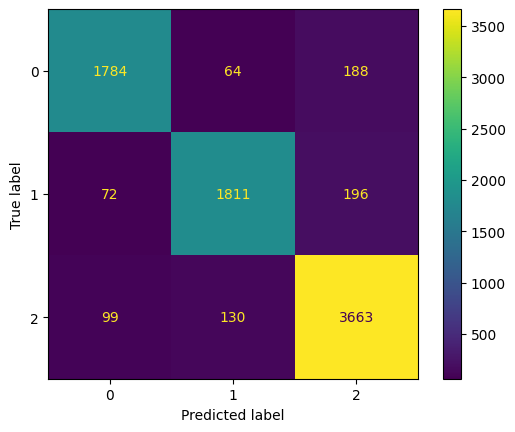

In [61]:
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=rf.classes_)
display_cm.plot()

Com 91% de acurácia, o RandomForestClassifier se saiu um pouco melhor do que o LogisticRegression.  
É possível observar que os valores previstos corretamente aumentaram.